In [166]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
Afx =  (27547, 165)
Afy =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)
V matrix (165, 165)
N node =  28789
number of Mirror Front surface TCs =  48
number of Mirror Back surface TCs =  48
number of Mirror Middle TCs =  16


In [2]:
currentNear = 850
currentFar = 315

### We start with a stress tool validation: run on Christoph's mat file for 46 bending modes, and see if we can reproduce his stress results

In [3]:
outputFileCD = 'input_output/totalStress_email_from_Christoph.xlsx'
df = pd.read_excel(outputFileCD)
totalStressCD = np.max(np.array(df), axis=1)/6894.7573

outputFileBo = 'input_output/stressOutput_46modes_validation.csv'
df = pd.read_csv(outputFileBo)
totalStressBo = np.array(df['totalPsi'])

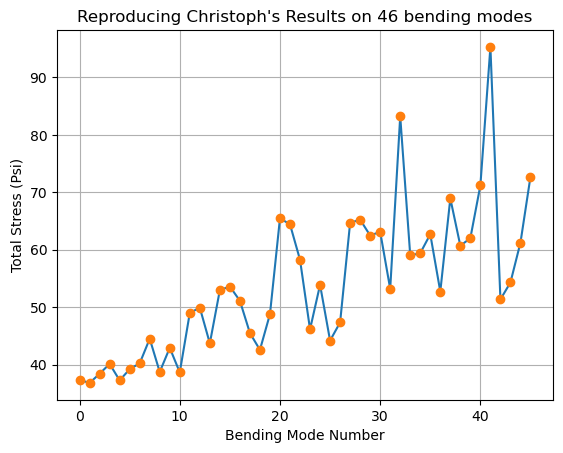

In [4]:
plt.plot(totalStressBo)
plt.plot(totalStressCD,'o')
plt.xlabel('Bending Mode Number')
plt.ylabel('Total Stress (Psi)')
plt.title("Reproducing Christoph's Results on 46 bending modes")
plt.grid();

### Five mode permutations (BM 1-5, -1um to 1um, 5 levels, 5**5 = 3125 permutations)

In [5]:
dataFolder = '/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents'
ChrisFolder = dataFolder+'/Software Data/bending_stress/'
inputFile = ChrisFolder+'bending_mode_verification_permutations_5_20250111.csv'

In [151]:
def read_input_output(inputFile):
    print('inputFile = ', inputFile)
    df= pd.read_csv(inputFile)
    nearNei = np.array(df['MaxNearestNeighbor'])
    farNei = np.array(df['MaxLocalVsGlobal'])
    sa_columns = df.loc[:, df.columns.str.startswith('SA')]
    FzRead = sa_columns.to_numpy()
    coeff_columns = df.loc[:, df.columns.str.startswith('Mode')]
    coeffRead = coeff_columns.to_numpy()
    print(FzRead.shape, coeffRead.shape)
    outputFile = 'input_output/'+inputFile.split('/')[-1].replace('csv', 'output.csv')
    print('outputFile = ', outputFile)
    
    try:
        df = pd.read_csv(outputFile)
        totalPsi = df['totalPsi']
        print(totalPsi.shape)
        localPsi = df['localPsi']
        globalPsi = df['globalPsi']
    except FileNotFoundError:
        print("Reading TR's processed csv...")
        outputFile = inputFile.replace('.csv', '_processed.csv')
        df = pd.read_csv(outputFile)
        totalPsi = df['MaxStress_psi']
        print(totalPsi.shape)
        localPsi = df['MaxStress_psi']
        globalPsi = df['MaxStress_psi']
    
    return FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi

In [7]:
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/bending_mode_verification_permutations_5_20250111.csv
(3125, 170) (3125, 5)
outputFile =  input_output/bending_mode_verification_permutations_5_20250111.output.csv
(3125,)


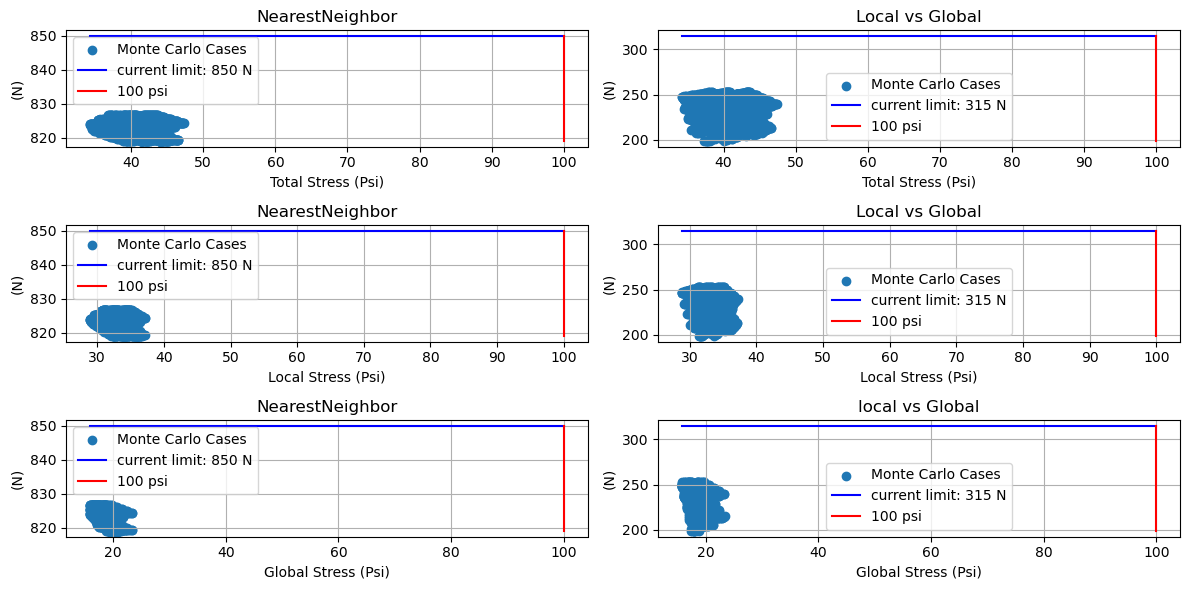

In [8]:
def plot_nei_vs_stress():
    plt.figure(figsize=(12, 6))  # Adjust the figure size
    plt.subplot(3, 2, 1) 
    plt.scatter(totalPsi, nearNei, label="Monte Carlo Cases")
    plt.xlabel('Total Stress (Psi)')
    plt.ylabel('(N)')
    plt.title('NearestNeighbor')
    plt.plot([np.min(totalPsi), 100], [currentNear, currentNear], color='b', label='current limit: 850 N') ;
    plt.plot([100, 100], [np.min(nearNei), currentNear], color='r', label='100 psi')
    plt.legend()
    plt.grid()

    plt.subplot(3, 2, 2) 
    plt.scatter(totalPsi, farNei, label='Monte Carlo Cases')
    plt.xlabel('Total Stress (Psi)')
    plt.title('Local vs Global')
    plt.ylabel('(N)')
    plt.plot([np.min(totalPsi), 100], [currentFar, currentFar], color='b', label='current limit: 315 N') ;
    plt.plot([100, 100], [np.min(farNei), currentFar], color='r', label='100 psi')
    plt.legend()
    plt.grid()
    
    plt.subplot(3, 2, 3) 
    plt.scatter(localPsi, nearNei, label="Monte Carlo Cases")
    plt.xlabel('Local Stress (Psi)')
    plt.ylabel('(N)')
    plt.title('NearestNeighbor')
    plt.plot([np.min(localPsi), 100], [currentNear, currentNear], color='b', label='current limit: 850 N') ;
    plt.plot([100, 100], [np.min(nearNei), currentNear], color='r', label='100 psi')
    plt.legend()
    plt.grid()

    plt.subplot(3, 2, 4) 
    plt.scatter(localPsi, farNei, label='Monte Carlo Cases')
    plt.xlabel('Local Stress (Psi)')
    plt.title('Local vs Global')
    plt.ylabel('(N)')
    plt.plot([np.min(localPsi), 100], [currentFar, currentFar], color='b', label='current limit: 315 N') ;
    plt.plot([100, 100], [np.min(farNei), currentFar], color='r', label='100 psi')
    plt.legend()
    plt.grid()
    
    plt.subplot(3, 2, 5) 
    plt.scatter(globalPsi, nearNei, label="Monte Carlo Cases")
    plt.xlabel('Global Stress (Psi)')
    plt.ylabel('(N)')
    plt.title('NearestNeighbor')
    plt.plot([np.min(globalPsi), 100], [currentNear, currentNear], color='b', label='current limit: 850 N') ;
    plt.plot([100, 100], [np.min(nearNei), currentNear], color='r', label='100 psi')
    plt.legend()
    plt.grid()

    plt.subplot(3, 2, 6) 
    plt.scatter(globalPsi, farNei, label='Monte Carlo Cases')
    plt.xlabel('Global Stress (Psi)')
    plt.title('local vs Global')
    plt.ylabel('(N)')
    plt.plot([np.min(globalPsi), 100], [currentFar, currentFar], color='b', label='current limit: 315 N') ;
    plt.plot([100, 100], [np.min(farNei), currentFar], color='r', label='100 psi')
    plt.legend()
    plt.grid()    
    
    plt.tight_layout()
    plt.show()
plot_nei_vs_stress()

### Now 46 modes, each with scaling factor defined by Buddy

In [83]:
inputFile = ChrisFolder+'bending_mode_verification_characterization_46_20250111.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/bending_mode_verification_characterization_46_20250111.csv
(46, 170) (46, 46)
outputFile =  input_output/bending_mode_verification_characterization_46_20250111.output.csv
(46,)


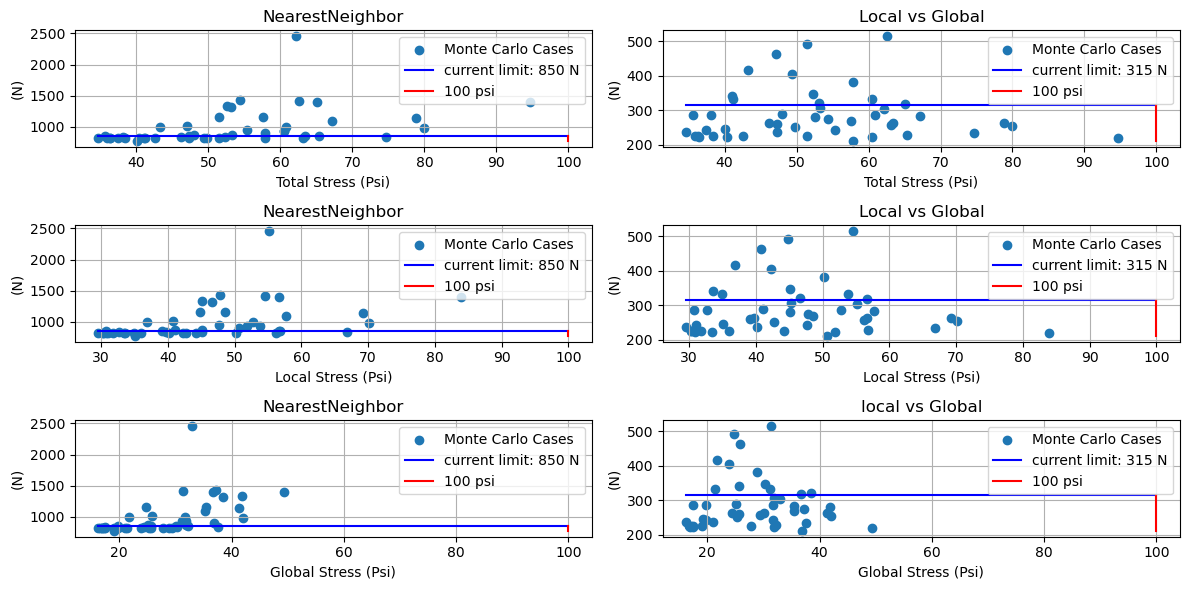

In [84]:
plot_nei_vs_stress()

THIS IS ONLY FOR 46 MODES


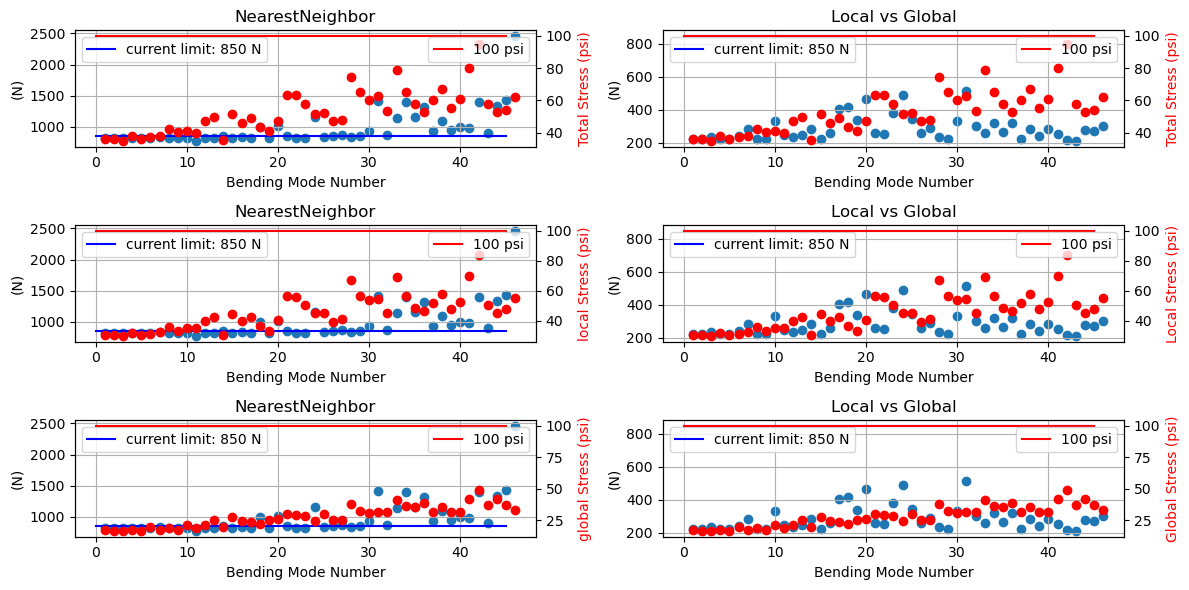

In [85]:
def plot_nei_vs_stress_vs_mode(nmodes=46):
    print('THIS IS ONLY FOR %d MODES'%nmodes)
    fig, axs = plt.subplots(3, 2, figsize=(12, 6))
    ax1 = axs[0][0]  # First subplot
    ax1.scatter(np.arange(nmodes)+1, nearNei)# label="Monte Carlo Cases")
    ax1.set_xlabel('Bending Mode Number')
    ax1.set_ylabel('(N)')
    ax1.set_title('NearestNeighbor')
    ax1.grid()
    ax12 = ax1.twinx() 
    ax12.scatter(np.arange(nmodes)+1,totalPsi,color='red')
    ax12.set_ylabel("Total Stress (psi)", color='red')
    ax1.plot([0, nmodes-1], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax1.legend(loc='upper left')
    ax12.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax12.legend(loc='upper right')

    ax2 = axs[0][1]
    ax2.scatter(np.arange(nmodes)+1, farNei) #, label='Monte Carlo Cases')
    ax2.set_xlabel('Bending Mode Number')
    ax2.set_title('Local vs Global')
    ax2.set_ylabel('(N)')
    ax2.grid()
    ax22 = ax2.twinx() 
    ax22.scatter(np.arange(nmodes)+1,totalPsi,color='red')
    ax22.set_ylabel("Total Stress (psi)", color='red')
    ax2.plot([0, nmodes-1], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax2.legend(loc='upper left')
    ax22.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax22.legend(loc='upper right')
    
    ax3 = axs[1][0]  # First subplot
    ax3.scatter(np.arange(nmodes)+1, nearNei)# label="Monte Carlo Cases")
    ax3.set_xlabel('Bending Mode Number')
    ax3.set_ylabel('(N)')
    ax3.set_title('NearestNeighbor')
    ax3.grid()
    ax32 = ax3.twinx() 
    ax32.scatter(np.arange(nmodes)+1,localPsi,color='red')
    ax32.set_ylabel("local Stress (psi)", color='red')
    ax3.plot([0, nmodes-1], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax3.legend(loc='upper left')
    ax32.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax32.legend(loc='upper right')
    
    ax4 = axs[1][1]
    ax4.scatter(np.arange(nmodes)+1, farNei) #, label='Monte Carlo Cases')
    ax4.set_xlabel('Bending Mode Number')
    ax4.set_title('Local vs Global')
    ax4.set_ylabel('(N)')
    ax4.grid()
    ax42 = ax4.twinx() 
    ax42.scatter(np.arange(nmodes)+1,localPsi,color='red')
    ax42.set_ylabel("Local Stress (psi)", color='red')
    ax4.plot([0, nmodes-1], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax4.legend(loc='upper left')
    ax42.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax42.legend(loc='upper right')
    
    ax5 = axs[2][0]  # First subplot
    ax5.scatter(np.arange(nmodes)+1, nearNei)# label="Monte Carlo Cases")
    ax5.set_xlabel('Bending Mode Number')
    ax5.set_ylabel('(N)')
    ax5.set_title('NearestNeighbor')
    ax5.grid()
    ax52 = ax5.twinx() 
    ax52.scatter(np.arange(nmodes)+1,globalPsi,color='red')
    ax52.set_ylabel("global Stress (psi)", color='red')
    ax5.plot([0, nmodes-1], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax5.legend(loc='upper left')
    ax52.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax52.legend(loc='upper right')
    
    ax6 = axs[2][1]
    ax6.scatter(np.arange(nmodes)+1, farNei) #, label='Monte Carlo Cases')
    ax6.set_xlabel('Bending Mode Number')
    ax6.set_title('Local vs Global')
    ax6.set_ylabel('(N)')
    ax6.grid()
    ax62 = ax6.twinx() 
    ax62.scatter(np.arange(nmodes)+1,globalPsi,color='red')
    ax62.set_ylabel("Global Stress (psi)", color='red')
    ax6.plot([0, nmodes-1], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax6.legend(loc='upper left')
    ax62.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax62.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
plot_nei_vs_stress_vs_mode()

In [62]:
#for mode 14, would 500nm (sec 8 repeatability test) fault the mirror
#simple scaling below is only a quick and dirty estimate, because there is also gravity.
print(coeffRead[13][13],nearNei[13], nearNei[13]/471*500, currentNear, nearNei[13]/471*400, totalPsi[13])
print(coeffRead[13][13],farNei[13], farNei[13]/471*500, currentFar, farNei[13]/471*400)

4.71e-07 853.5999 906.1570063694268 850 724.9256050955414 35.6180890228668
4.71e-07 284.5841 302.10626326963904 315 241.6850106157112


In [21]:
nearNei46SA = nearNei.copy() #so we can later compare to per puck limits
farNei46SA = farNei.copy()

### Same 5**5 permutations, with nearNei and farNei re-calculated using per-puck force

In [22]:
inputFile = ChrisFolder+'puck_bending_mode_verification_permutations_5_20250112.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/puck_bending_mode_verification_permutations_5_20250112.csv
(3125, 170) (3125, 5)
outputFile =  input_output/puck_bending_mode_verification_permutations_5_20250112.output.csv
(3125,)


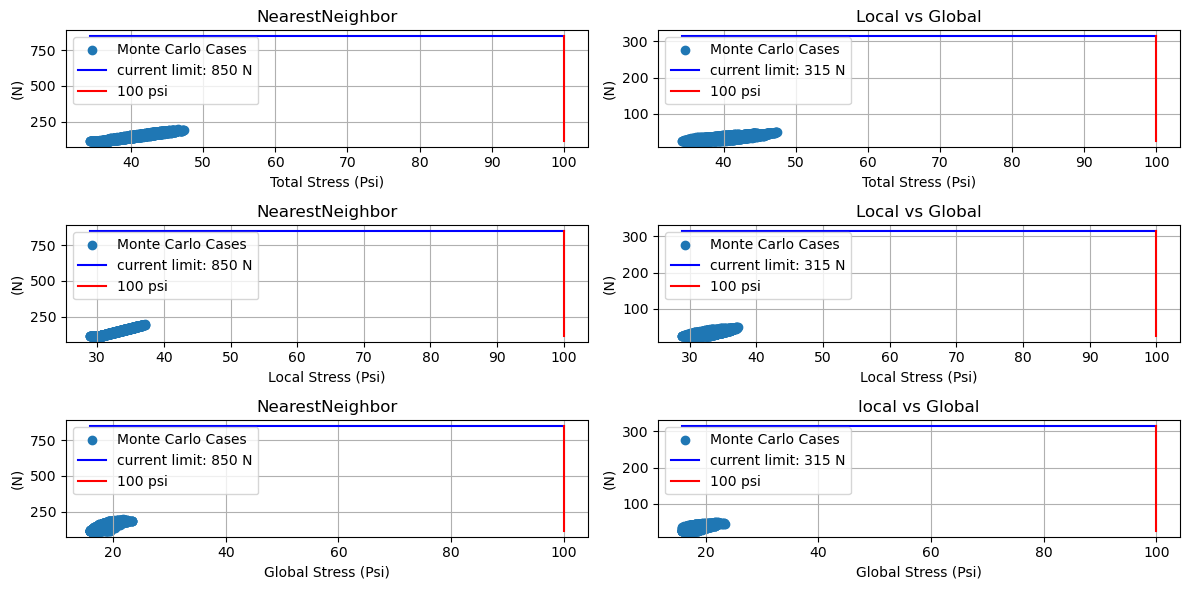

In [23]:
plot_nei_vs_stress()

### Same 46 modes, with nearNei and farNei re-calculated using per-puck force

In [24]:
inputFile = ChrisFolder+'puck_bending_mode_verification_characterization_46_20250112.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/puck_bending_mode_verification_characterization_46_20250112.csv
(46, 170) (46, 46)
outputFile =  input_output/puck_bending_mode_verification_characterization_46_20250112.output.csv
(46,)


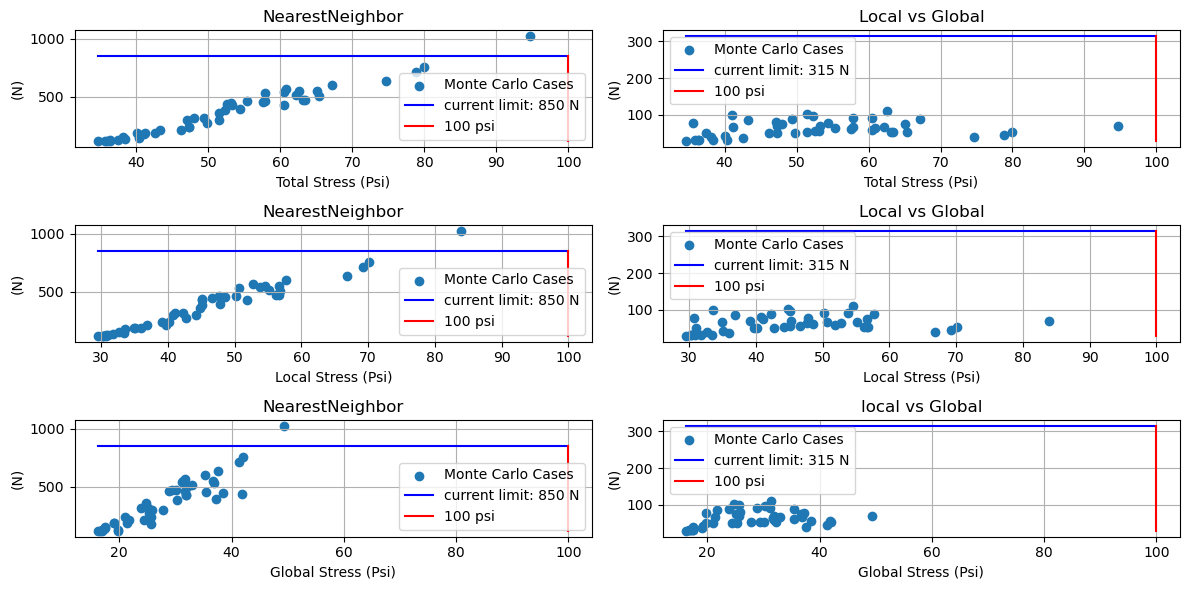

In [25]:
plot_nei_vs_stress()

THIS IS ONLY FOR 46 MODES


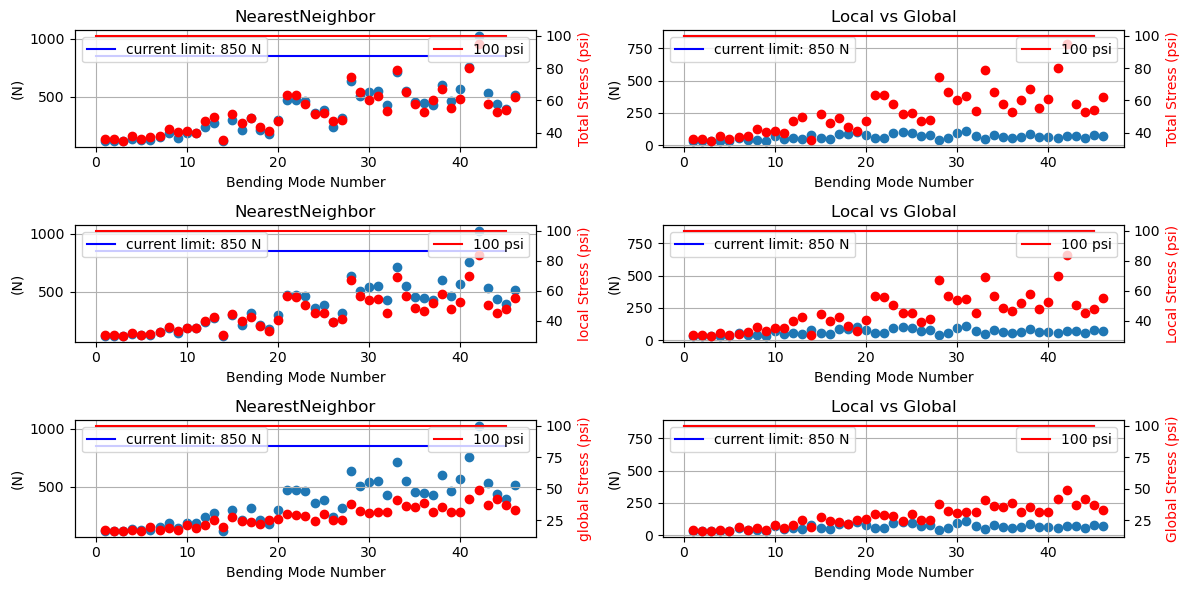

In [26]:
plot_nei_vs_stress_vs_mode()

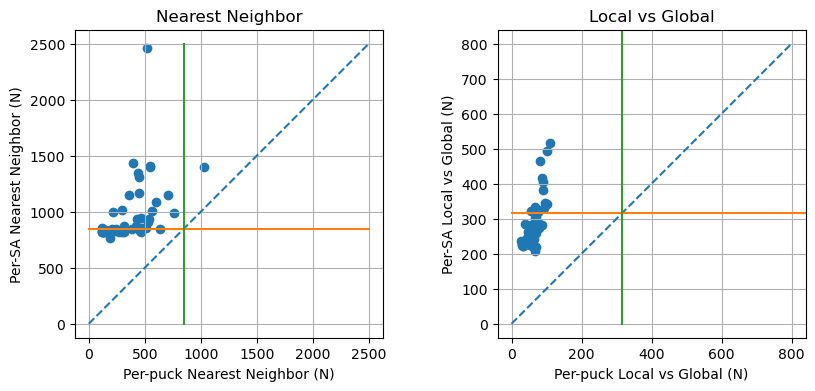

In [27]:
plt.figure(figsize=(10, 4))  # Adjust the figure size
plt.subplot(1, 2, 1) 
plt.scatter(nearNei, nearNei46SA, label="Monte Carlo Cases")
plt.xlabel('Per-puck Nearest Neighbor (N)')
plt.ylabel('Per-SA Nearest Neighbor (N)')
plt.plot([0, 2500], [0, 2500], linestyle='--')
plt.axis('equal')
plt.axis('square')
plt.title('Nearest Neighbor')
plt.plot([0, 2500], [currentNear, currentNear])
plt.plot([currentNear, currentNear],[0, 2500])
plt.grid()

plt.subplot(1, 2, 2) 
plt.scatter(farNei, farNei46SA, label="Monte Carlo Cases")
plt.xlabel('Per-puck Local vs Global (N)')
plt.ylabel('Per-SA Local vs Global (N)')
plt.plot([0, 800], [0, 800], linestyle='--')
plt.axis('equal')
plt.axis('square')
plt.title('Local vs Global')
plt.plot([0, 2500], [currentFar, currentFar])
plt.plot([currentFar, currentFar],[0, 2500])
plt.grid()

In [28]:
#for mode 14, would 500nm (sec 8 repeatability test) fault the mirror
#simple scaling below is only a quick and dirty estimate, because there is also gravity.
print(coeffRead[13][13],nearNei[13], nearNei[13]/471*500, currentNear, nearNei[13]/471*400, totalPsi[13])
print(coeffRead[13][13],farNei[13], farNei[13]/471*500, currentFar, farNei[13]/471*400)

4.71e-07 114.5891 121.64447983014861 850 97.31558386411889 35.6180890228668
4.71e-07 79.13746 84.01004246284502 315 67.20803397027602


### 1000 Monte Carlo, trying to simulate surface optimization process with 14 BMs

In [45]:
inputFile = ChrisFolder+'bending_mode_verification_random_14_20250111.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/bending_mode_verification_random_14_20250111.csv
(1000, 170) (1000, 14)
outputFile =  input_output/bending_mode_verification_random_14_20250111.output.csv
(1000,)


In [46]:
coeffRead.shape

(1000, 14)

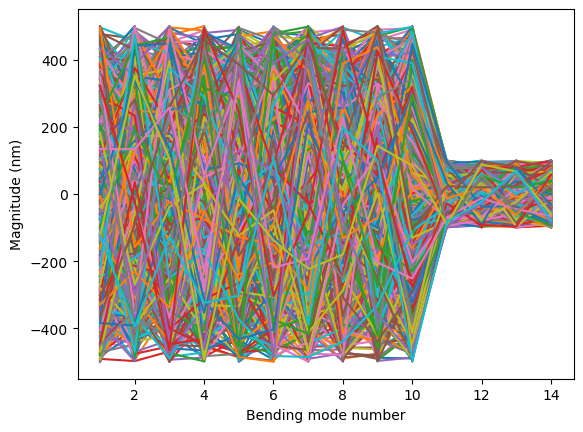

In [47]:
plt.plot(range(1,15),1e9*coeffRead.T)
plt.xlabel('Bending mode number')
plt.ylabel('Magnitude (nm)');

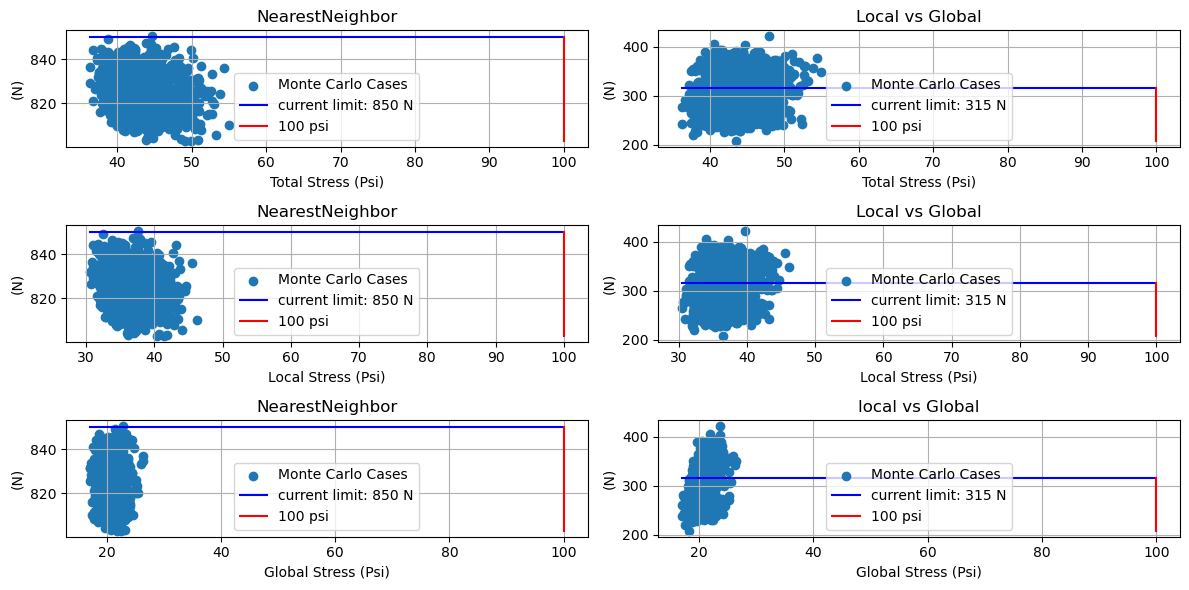

In [48]:
plot_nei_vs_stress()

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/bending_mode_verification_random_27_20250111.csv
(1000, 170) (1000, 27)
outputFile =  input_output/bending_mode_verification_random_27_20250111.output.csv
(1000,)


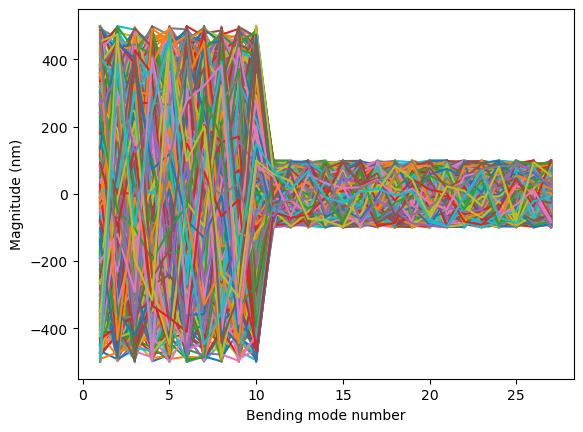

In [50]:
inputFile = ChrisFolder+'bending_mode_verification_random_27_20250111.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)
plt.plot(range(1,coeffRead.shape[1]+1),1e9*coeffRead.T)
plt.xlabel('Bending mode number')
plt.ylabel('Magnitude (nm)');

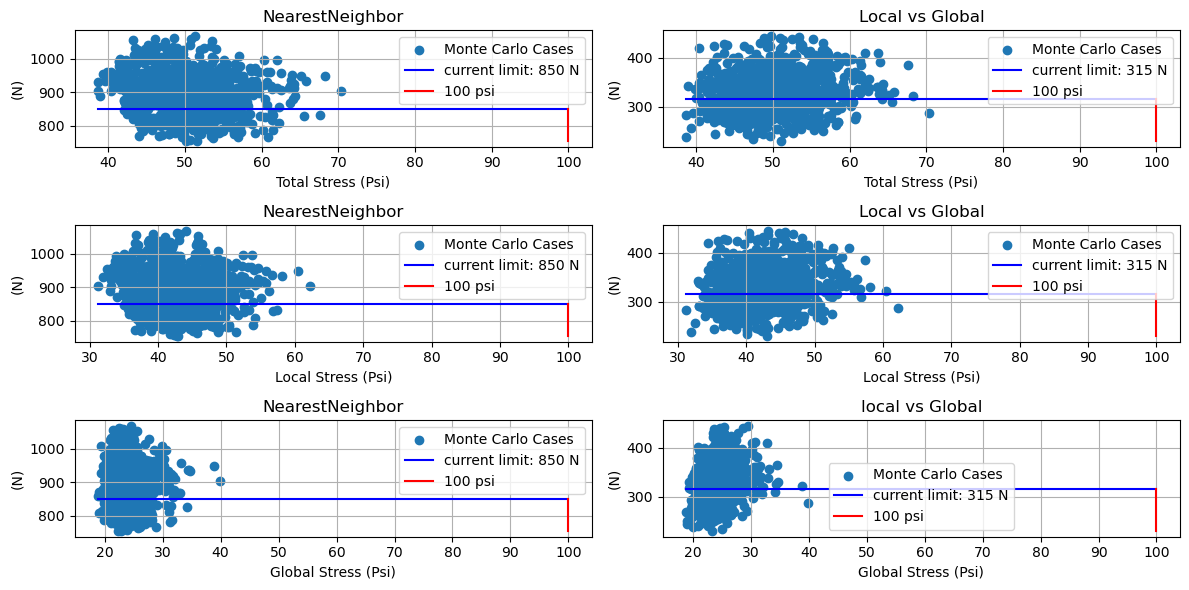

In [51]:
plot_nei_vs_stress()

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/bending_mode_verification_random_46_20250111.csv
(1000, 170) (1000, 46)
outputFile =  input_output/bending_mode_verification_random_46_20250111.output.csv
(1000,)


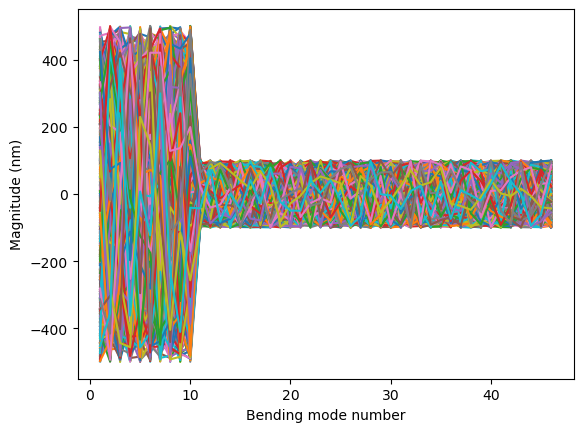

In [53]:
inputFile = ChrisFolder+'bending_mode_verification_random_46_20250111.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)
plt.plot(range(1,coeffRead.shape[1]+1),1e9*coeffRead.T)
plt.xlabel('Bending mode number')
plt.ylabel('Magnitude (nm)');

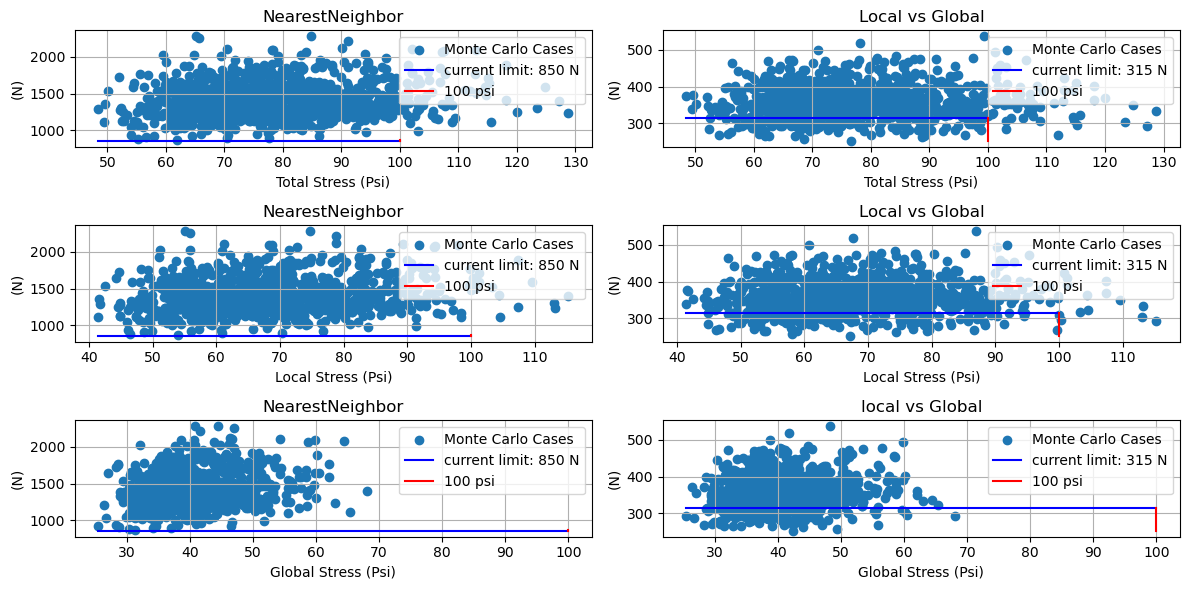

In [55]:
plot_nei_vs_stress()

### For Sec 8 repeatability test. 

For gravity support, we are using the Sec 6 optimized forces at baseline, instead of Sec 5 initial forces.

Chris wrote:

We get different values depending on -400 or +400

+400nm = 860 N nearest (bad) and 275 N local (good)

-400nm = 892 N nearest (bad) and 406 N local (bad)

+500nm = 866 N nearest (bad) and 287 N local (good)

-500nm = 917 N nearest (bad) and 456 N local (bad)

In [86]:
#ordering below is like, +1 -1 +2 -2 +3 -3
inputFile = '../stress_tool/input_output/bending_mode_verification_46_PN_20250114.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

inputFile =  ../stress_tool/input_output/bending_mode_verification_46_PN_20250114.csv
(92, 170) (92, 46)
outputFile =  input_output/bending_mode_verification_46_PN_20250114.output.csv
(92,)


In [87]:
i1 = 2*13+1-1
i2 = 2*14-1

In [88]:
for i in range(46):
    modeID = i//2+1
    pm = '+' if np.mod(i,2)==0 else '-'
    print(modeID, pm)
    if modeID == 14:
        print('NN and LG:')
        print(pm, '400nm = ', nearNei[i], farNei[i])
        print('Total stress (Psi)')
        print(pm, '400nm = ', totalPsi[i], 'Psi (total stress)')

1 +
1 -
2 +
2 -
3 +
3 -
4 +
4 -
5 +
5 -
6 +
6 -
7 +
7 -
8 +
8 -
9 +
9 -
10 +
10 -
11 +
11 -
12 +
12 -
13 +
13 -
14 +
NN and LG:
+ 400nm =  859.6112 283.9421
Total stress (Psi)
+ 400nm =  35.7424368472883 Psi (total stress)
14 -
NN and LG:
- 400nm =  891.8938 401.8838
Total stress (Psi)
- 400nm =  41.3876363159598 Psi (total stress)
15 +
15 -
16 +
16 -
17 +
17 -
18 +
18 -
19 +
19 -
20 +
20 -
21 +
21 -
22 +
22 -
23 +
23 -


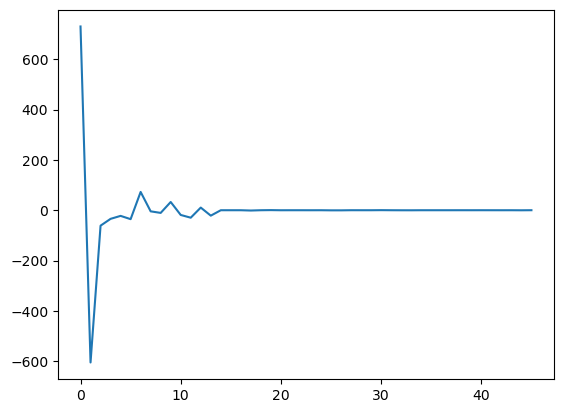

In [89]:
plt.plot(coeffRead[0,:]*1e9)

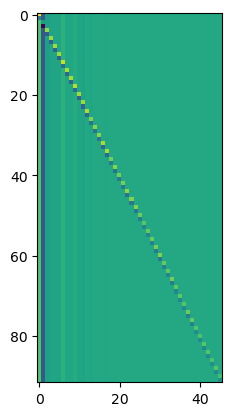

In [90]:
plt.imshow(coeffRead)

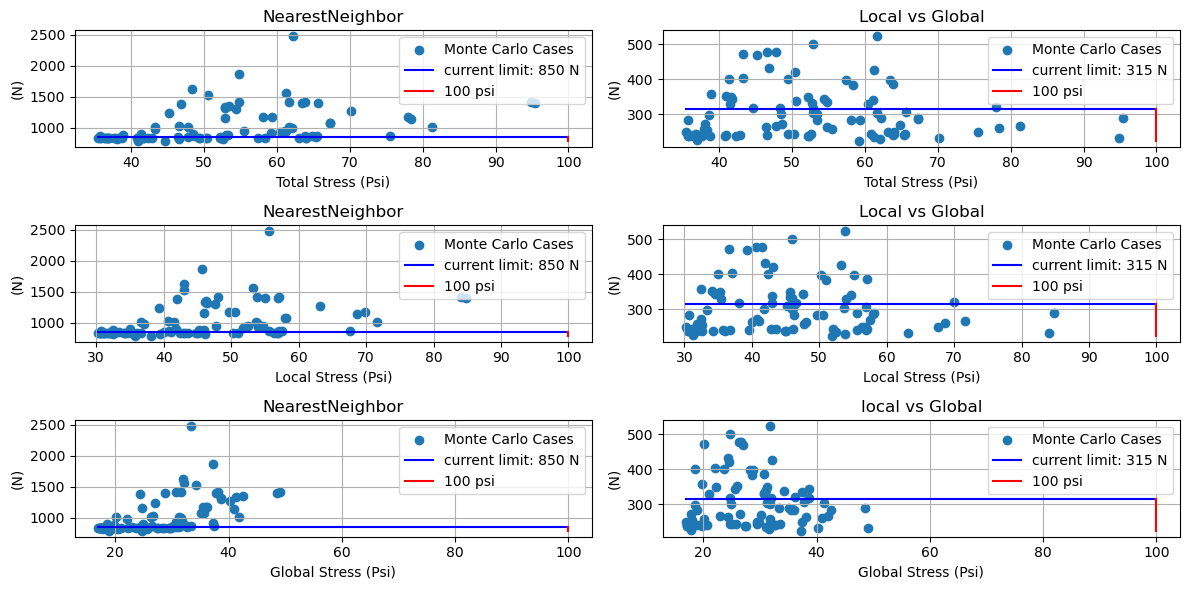

In [91]:
plot_nei_vs_stress()

THIS IS ONLY FOR 92 MODES


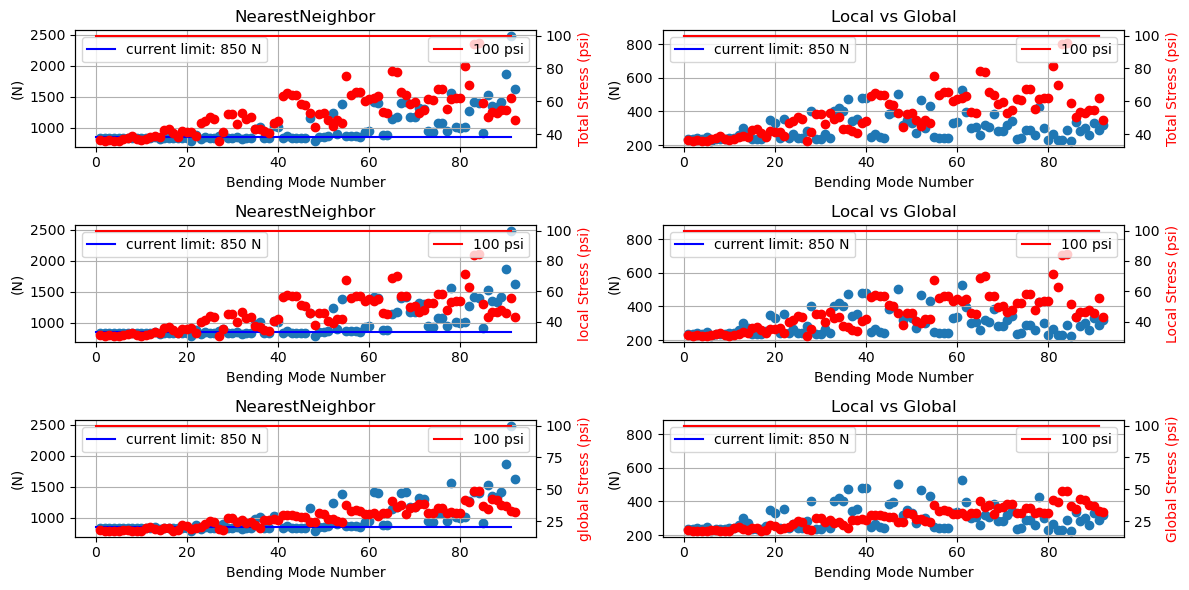

In [92]:
plot_nei_vs_stress_vs_mode(nmodes=92)

### 46 modes, push & pull, per puck NN & LG evaluations

In [139]:
inputFile = ChrisFolder+'puck_bending_mode_verification_optimized_forces_characterization_46_20250115.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/puck_bending_mode_verification_optimized_forces_characterization_46_20250115.csv
(92, 170) (92, 46)
outputFile =  input_output/puck_bending_mode_verification_optimized_forces_characterization_46_20250115.output.csv
(92,)


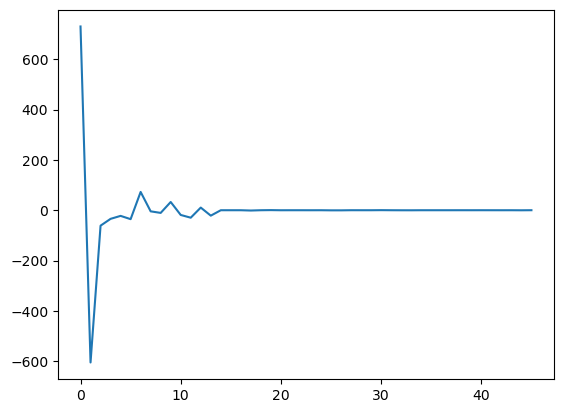

In [140]:
plt.plot(coeffRead[0,:]*1e9)
#only 1 out of the 46 coefficients in this file should be nonzero, correct?
#No, we are using the initial optimized force set as a baseline.

In [141]:
TRFile = ChrisFolder+'puck_bending_mode_verification_optimized_forces_characterization_46_20250115_processed.csv'
df = pd.read_csv(TRFile)

In [142]:
df

TestCase         Mode1         Mode2         Mode3         Mode4  \
0          1  7.304135e-07 -6.051641e-07 -6.134403e-08 -3.424327e-08   
1          2 -2.695865e-07 -6.051641e-07 -6.134403e-08 -3.424327e-08   
2          3  2.304135e-07 -1.051641e-07 -6.134403e-08 -3.424327e-08   
3          4  2.304135e-07 -1.105164e-06 -6.134403e-08 -3.424327e-08   
4          5  2.304135e-07 -6.051641e-07  4.386560e-07 -3.424327e-08   
..       ...           ...           ...           ...           ...   
87        88  2.304135e-07 -6.051641e-07 -6.134403e-08 -3.424327e-08   
88        89  2.304135e-07 -6.051641e-07 -6.134403e-08 -3.424327e-08   
89        90  2.304135e-07 -6.051641e-07 -6.134403e-08 -3.424327e-08   
90        91  2.304135e-07 -6.051641e-07 -6.134403e-08 -3.424327e-08   
91        92  2.304135e-07 -6.051641e-07 -6.134403e-08 -3.424327e-08   

           Mode5         Mode6         Mode7         Mode8         Mode9  ...  \
0  -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
1  -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
2  -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
3  -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
4  -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
..           ...           ...           ...           ...           ...  ...   
87 -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
88 -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
89 -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
90 -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   
91 -2.244885e-08 -3.546501e-08  7.272026e-08 -4.390304e-09 -1.062760e-08  ...   

        SA126      SA1144     SA1313     SA1326     SA1113     SA1126  \
0   -935.0282  -904.23670  -923.0055  -964.3475  -899.4632  -935.0282   
1   -935.0595  -904.23790  -923.0146  -964.3783  -899.4726  -935.0595   
2   -936.2081  -904.30900  -923.3744  -965.5175  -899.8377  -936.2081   
3   -933.8796  -904.16560  -922.6456  -963.2083  -899.0981  -933.8796   
4   -937.8381  -913.01550  -930.0054  -967.1069  -906.5096  -937.8381   
..        ...         ...        ...        ...        ...        ...   
87  -935.0193  -904.24540  -922.9639  -964.3388  -899.4113  -935.0193   
88 -1351.4070  -489.12280  -328.3868 -1365.3050  -289.9759 -1351.4070   
89  -518.6804 -1319.35200 -1517.6330  -563.4208 -1508.9600  -518.6804   
90 -1258.9120 -1843.51600  -420.5848 -1281.7870  -383.0256 -1258.9120   
91  -611.1753    35.04095 -1425.4350  -646.9388 -1415.9100  -611.1753   

    MaxNearestNeighbor  MaxLocalVsGlobal  MaxAbsOffset  MaxStress_psi  
0             127.1886          34.14825      28.52391      36.414749  
1             121.7768          33.60966      33.72306      35.796467  
2             127.1588          34.22787      26.20456      36.700352  
3             121.8065          33.53004      36.04242      35.888533  
4             118.2134          31.17798      38.87373      35.527788  
..                 ...               ...           ...            ...  
87            452.6392          58.61200    1191.04400      52.933090  
88            390.7018          84.07292    1449.92800      54.786909  
89            539.2354          70.06886    1436.66800      54.778529  
90            521.0338          64.71796     954.09890      62.279037  
91            305.9738          51.39222     924.45760      48.423973  

[92 rows x 221 columns]

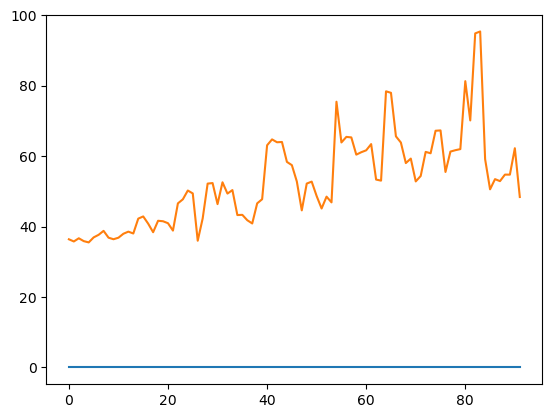

In [143]:
plt.plot(df['MaxStress_psi'] - totalPsi)
plt.plot(totalPsi);
#checking to make sure this matches TR's processing

In [164]:
#re-read the data. otherwise the reshuffling below keeps reshuttfling them when executed multiple times
inputFile = ChrisFolder+'puck_bending_mode_verification_optimized_forces_characterization_46_20250115.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

x00 = np.concatenate((np.arange(-nmodes,0,1), np.arange(nmodes)+1))
def minus_N_to_plus_N(nearNei):
    return np.concatenate((nearNei[1::2][::-1], nearNei[::2]))
nearNei = minus_N_to_plus_N(nearNei)
farNei = minus_N_to_plus_N(farNei)
totalPsi = minus_N_to_plus_N(totalPsi)
localPsi = minus_N_to_plus_N(localPsi)
globalPsi = minus_N_to_plus_N(globalPsi)

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/puck_bending_mode_verification_optimized_forces_characterization_46_20250115.csv
(92, 170) (92, 46)
outputFile =  input_output/puck_bending_mode_verification_optimized_forces_characterization_46_20250115.output.csv
(92,)


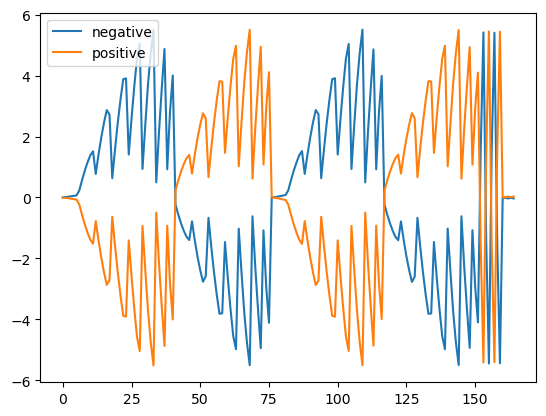

In [211]:
df = pd.read_csv(ml_data_dir+'/../../section_10_take2/initial_optimized_forces_bm1_n500.txt', header=None)
mlbfn = np.array(df[1])
df = pd.read_csv(ml_data_dir+'/../../section_10_take2/initial_optimized_forces_bm1_p500.txt', header=None)
mlbfp = np.array(df[1])
df = pd.read_csv(ml_data_dir+'/../../initial_optimized_forces.txt', header=None)
fpart2 = np.array(df[1])

plt.plot(mlbfn-fpart2, label='negative')
plt.plot(mlbfp-fpart2, label='positive')
plt.legend();

In [194]:
df

0          1
0    101  -2.481564
1    102  11.618726
2    103  16.943335
3    104   9.141624
4    105  -7.318917
..   ...        ...
160  144 -29.641355
161  313 -34.605657
162  326 -19.188090
163  113   4.316386
164  126  26.623480

[165 rows x 2 columns]

input forces and output figure both in M1B


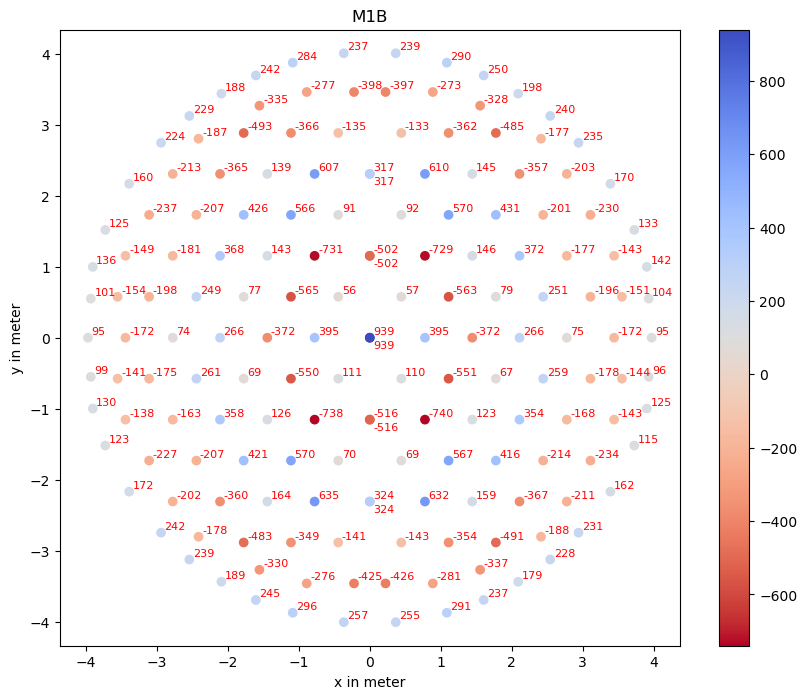

In [169]:
showForceMap_M1B(FzRead[-1,:]-FzRead[0,:], figure_title='M1B')

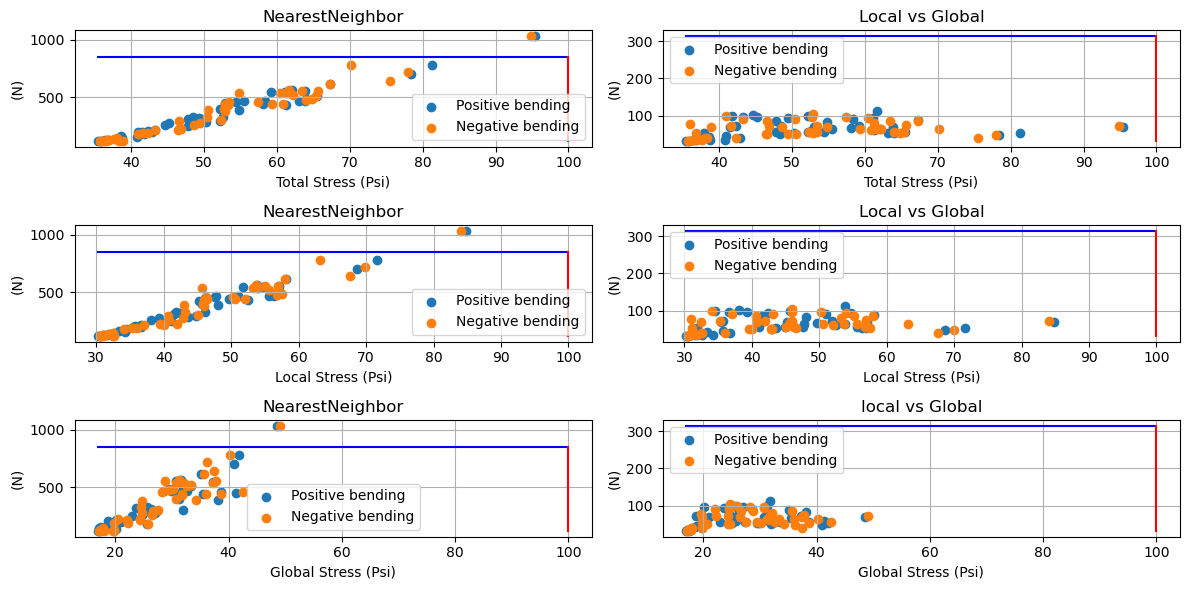

In [146]:
def plot_nei_vs_stress_pm():
    plt.figure(figsize=(12, 6))  # Adjust the figure size
    plt.subplot(3, 2, 1) 
    plt.scatter(totalPsi[::2], nearNei[::2], label="Positive bending")
    plt.scatter(totalPsi[1::2], nearNei[1::2], label="Negative bending")
    plt.xlabel('Total Stress (Psi)')
    plt.ylabel('(N)')
    plt.title('NearestNeighbor')
    plt.plot([np.min(totalPsi), 100], [currentNear, currentNear], color='b')#, label='current limit: 850 N') ;
    plt.plot([100, 100], [np.min(nearNei), currentNear], color='r')#, label='100 psi')
    plt.legend()
    plt.grid()

    plt.subplot(3, 2, 2) 
    plt.scatter(totalPsi[::2], farNei[::2], label='Positive bending')
    plt.scatter(totalPsi[1::2], farNei[1::2], label='Negative bending')
    plt.xlabel('Total Stress (Psi)')
    plt.title('Local vs Global')
    plt.ylabel('(N)')
    plt.plot([np.min(totalPsi), 100], [currentFar, currentFar], color='b')#, label='current limit: 315 N') ;
    plt.plot([100, 100], [np.min(farNei), currentFar], color='r')#, label='100 psi')
    plt.legend()
    plt.grid()
    
    plt.subplot(3, 2, 3) 
    plt.scatter(localPsi[::2], nearNei[::2], label="Positive bending")
    plt.scatter(localPsi[1::2], nearNei[1::2], label="Negative bending")
    plt.xlabel('Local Stress (Psi)')
    plt.ylabel('(N)')
    plt.title('NearestNeighbor')
    plt.plot([np.min(localPsi), 100], [currentNear, currentNear], color='b')#, label='current limit: 850 N') ;
    plt.plot([100, 100], [np.min(nearNei), currentNear], color='r')#, label='100 psi')
    plt.legend()
    plt.grid()

    plt.subplot(3, 2, 4) 
    plt.scatter(localPsi[::2], farNei[::2], label='Positive bending')
    plt.scatter(localPsi[1::2], farNei[1::2], label='Negative bending')
    plt.xlabel('Local Stress (Psi)')
    plt.title('Local vs Global')
    plt.ylabel('(N)')
    plt.plot([np.min(localPsi), 100], [currentFar, currentFar], color='b')#, label='current limit: 315 N') ;
    plt.plot([100, 100], [np.min(farNei), currentFar], color='r')#, label='100 psi')
    plt.legend()
    plt.grid()
    
    plt.subplot(3, 2, 5) 
    plt.scatter(globalPsi[::2], nearNei[::2], label="Positive bending")
    plt.scatter(globalPsi[1::2], nearNei[1::2], label="Negative bending")
    plt.xlabel('Global Stress (Psi)')
    plt.ylabel('(N)')
    plt.title('NearestNeighbor')
    plt.plot([np.min(globalPsi), 100], [currentNear, currentNear], color='b')#, label='current limit: 850 N') ;
    plt.plot([100, 100], [np.min(nearNei), currentNear], color='r')#, label='100 psi')
    plt.legend()
    plt.grid()

    plt.subplot(3, 2, 6) 
    plt.scatter(globalPsi[::2], farNei[::2], label='Positive bending')
    plt.scatter(globalPsi[1::2], farNei[1::2], label='Negative bending')
    plt.xlabel('Global Stress (Psi)')
    plt.title('local vs Global')
    plt.ylabel('(N)')
    plt.plot([np.min(globalPsi), 100], [currentFar, currentFar], color='b')#, label='current limit: 315 N') ;
    plt.plot([100, 100], [np.min(farNei), currentFar], color='r')#, label='100 psi')
    plt.legend()
    plt.grid()    
    
    plt.tight_layout()
    plt.show()
plot_nei_vs_stress_pm()

THIS IS ONLY FOR 46 MODES


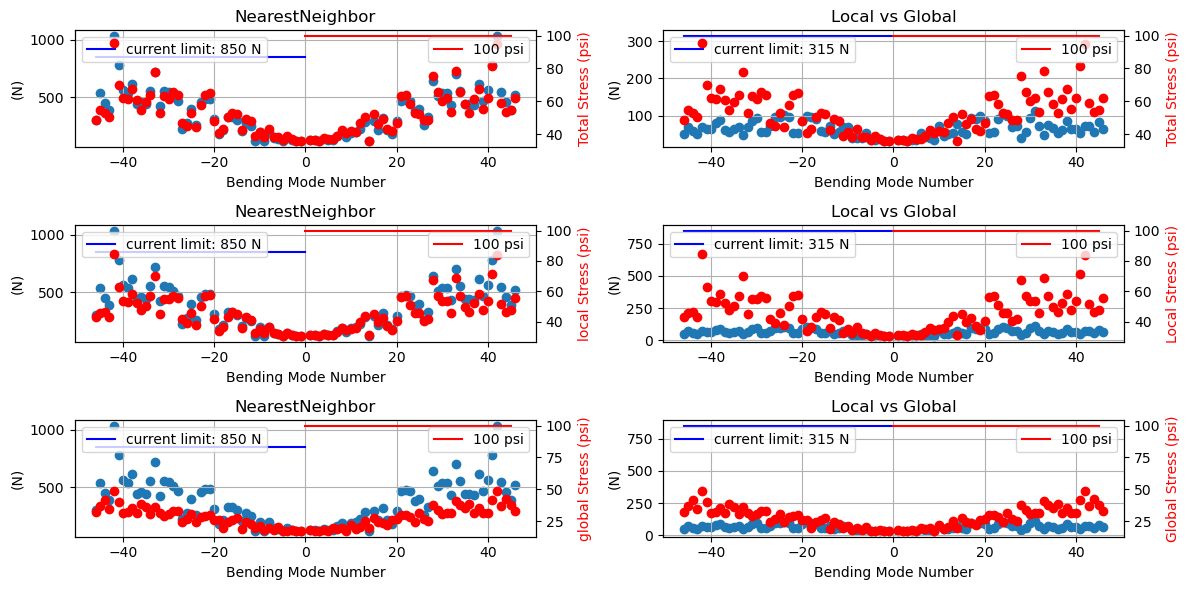

In [147]:
def plot_nei_vs_stress_vs_mode_pm(nmodes=46):
    print('THIS IS ONLY FOR %d MODES'%nmodes)
    fig, axs = plt.subplots(3, 2, figsize=(12, 6))
    ax1 = axs[0][0]  # First subplot
    ax1.scatter(x00, nearNei)# label="Monte Carlo Cases")
    ax1.set_xlabel('Bending Mode Number')
    ax1.set_ylabel('(N)')
    ax1.set_title('NearestNeighbor')
    ax1.grid()
    ax12 = ax1.twinx() 
    ax12.scatter(x00,totalPsi,color='red')
    ax12.set_ylabel("Total Stress (psi)", color='red')
    ax1.plot([-nmodes, 0], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax1.legend(loc='upper left')
    ax12.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax12.legend(loc='upper right')

    ax2 = axs[0][1]
    ax2.scatter(x00, farNei) #, label='Monte Carlo Cases')
    ax2.set_xlabel('Bending Mode Number')
    ax2.set_title('Local vs Global')
    ax2.set_ylabel('(N)')
    ax2.grid()
    ax22 = ax2.twinx() 
    ax22.scatter(x00,totalPsi,color='red')
    ax22.set_ylabel("Total Stress (psi)", color='red')
    ax2.plot([-nmodes, 0], [currentFar, currentFar], color='b', label='current limit: 315 N')
    ax2.legend(loc='upper left')
    ax22.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax22.legend(loc='upper right')
    
    ax3 = axs[1][0]  # First subplot
    ax3.scatter(x00, nearNei)# label="Monte Carlo Cases")
    ax3.set_xlabel('Bending Mode Number')
    ax3.set_ylabel('(N)')
    ax3.set_title('NearestNeighbor')
    ax3.grid()
    ax32 = ax3.twinx() 
    ax32.scatter(x00,localPsi,color='red')
    ax32.set_ylabel("local Stress (psi)", color='red')
    ax3.plot([-nmodes, 0], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax3.legend(loc='upper left')
    ax32.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax32.legend(loc='upper right')
    
    ax4 = axs[1][1]
    ax4.scatter(x00, farNei) #, label='Monte Carlo Cases')
    ax4.set_xlabel('Bending Mode Number')
    ax4.set_title('Local vs Global')
    ax4.set_ylabel('(N)')
    ax4.grid()
    ax42 = ax4.twinx() 
    ax42.scatter(x00,localPsi,color='red')
    ax42.set_ylabel("Local Stress (psi)", color='red')
    ax4.plot([-nmodes, 0], [currentNear, currentNear], color='b', label='current limit: 315 N')
    ax4.legend(loc='upper left')
    ax42.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax42.legend(loc='upper right')
    
    ax5 = axs[2][0]  # First subplot
    ax5.scatter(x00, nearNei)# label="Monte Carlo Cases")
    ax5.set_xlabel('Bending Mode Number')
    ax5.set_ylabel('(N)')
    ax5.set_title('NearestNeighbor')
    ax5.grid()
    ax52 = ax5.twinx() 
    ax52.scatter(x00,globalPsi,color='red')
    ax52.set_ylabel("global Stress (psi)", color='red')
    ax5.plot([-nmodes, 0], [currentNear, currentNear], color='b', label='current limit: 850 N')
    ax5.legend(loc='upper left')
    ax52.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax52.legend(loc='upper right')
    
    ax6 = axs[2][1]
    ax6.scatter(x00, farNei) #, label='Monte Carlo Cases')
    ax6.set_xlabel('Bending Mode Number')
    ax6.set_title('Local vs Global')
    ax6.set_ylabel('(N)')
    ax6.grid()
    ax62 = ax6.twinx() 
    ax62.scatter(x00,globalPsi,color='red')
    ax62.set_ylabel("Global Stress (psi)", color='red')
    ax6.plot([-nmodes, 0], [currentNear, currentNear], color='b', label='current limit: 315 N')
    ax6.legend(loc='upper left')
    ax62.plot([0, nmodes-1], [100, 100], color='r', label='100 psi')
    ax62.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
plot_nei_vs_stress_vs_mode_pm()

### 1000 MC, with 14 modes, per puck NN and LG

In [157]:
inputFile = ChrisFolder+'puck_bending_mode_verification_random_14_20250115.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/puck_bending_mode_verification_random_14_20250115.csv
(1000, 170) (1000, 14)
outputFile =  input_output/puck_bending_mode_verification_random_14_20250115.output.csv
(1000,)


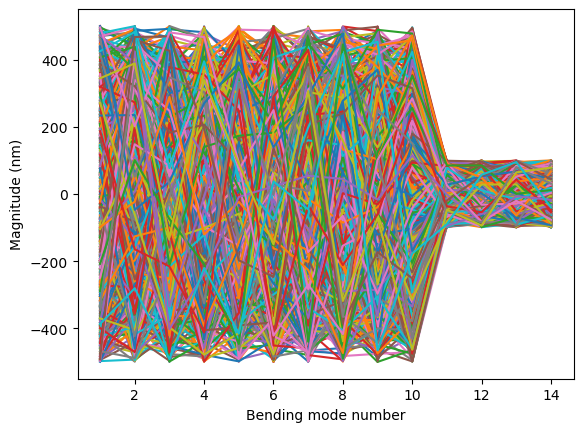

In [158]:
plt.plot(range(1,coeffRead.shape[1]+1),1e9*coeffRead.T)
plt.xlabel('Bending mode number')
plt.ylabel('Magnitude (nm)');

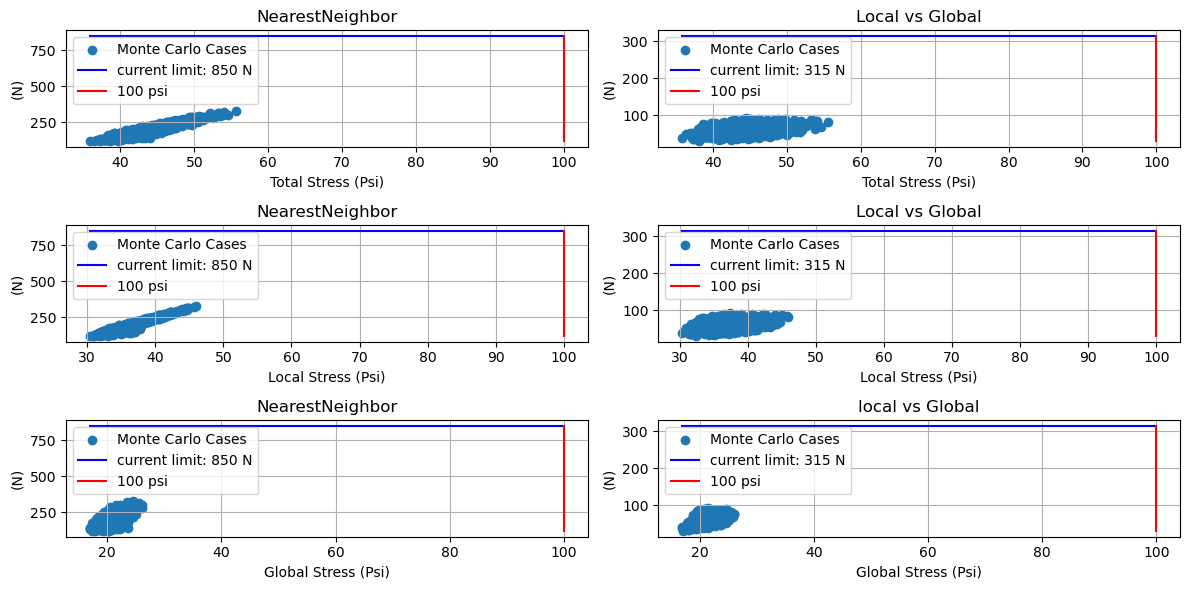

In [149]:
plot_nei_vs_stress()

### 27 modes

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/puck_bending_mode_verification_random_27_20250115.csv
(1000, 170) (1000, 27)
outputFile =  input_output/puck_bending_mode_verification_random_27_20250115.output.csv
(1000,)


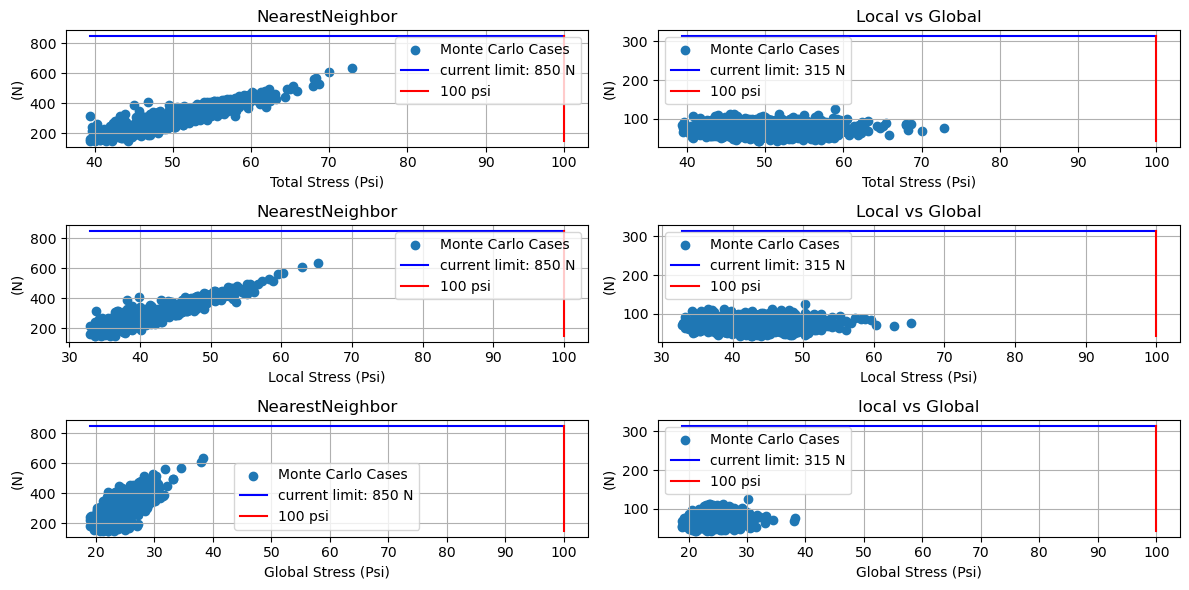

In [160]:
inputFile = ChrisFolder+'puck_bending_mode_verification_random_27_20250115.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)
plot_nei_vs_stress()

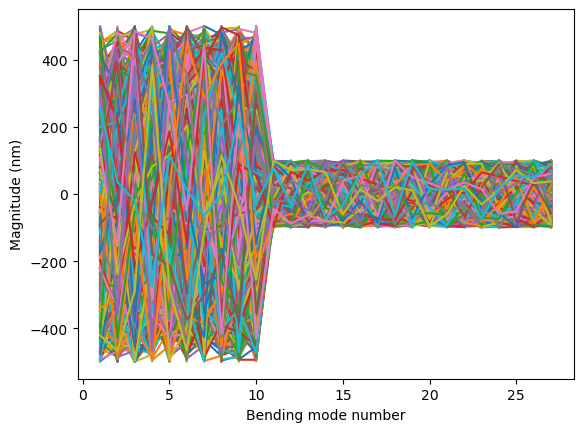

In [161]:
plt.plot(range(1,coeffRead.shape[1]+1),1e9*coeffRead.T)
plt.xlabel('Bending mode number')
plt.ylabel('Magnitude (nm)');

### 46 modes

inputFile =  /Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/Software Data/bending_stress/puck_bending_mode_verification_random_46_20250115.csv
(1000, 170) (1000, 46)
outputFile =  input_output/puck_bending_mode_verification_random_46_20250115.output.csv
(1000,)


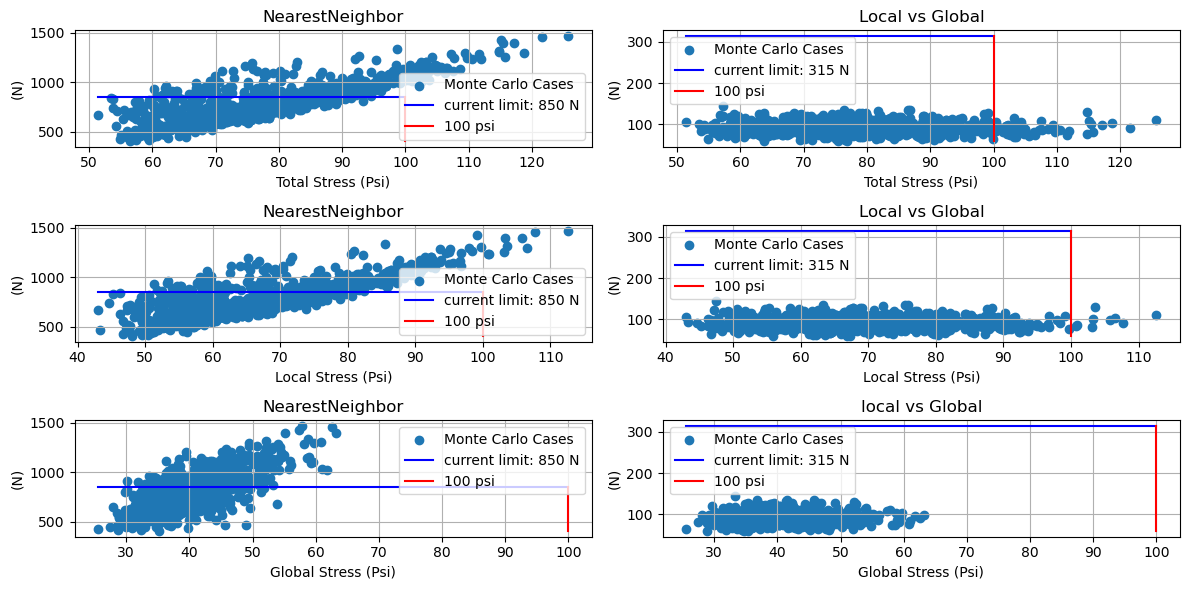

In [162]:
inputFile = ChrisFolder+'puck_bending_mode_verification_random_46_20250115.csv'
FzRead, coeffRead, nearNei, farNei, totalPsi, localPsi, globalPsi = read_input_output(inputFile)
plot_nei_vs_stress()

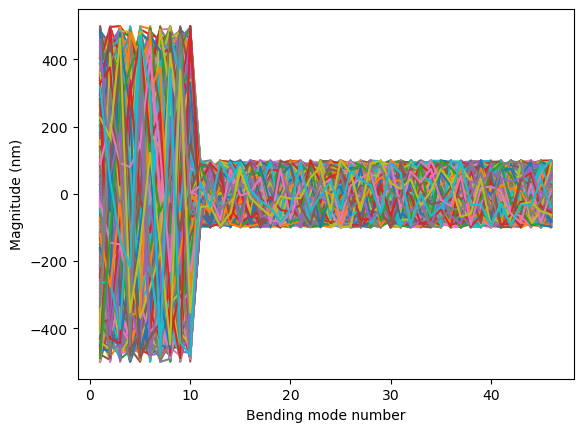

In [163]:
plt.plot(range(1,coeffRead.shape[1]+1),1e9*coeffRead.T)
plt.xlabel('Bending mode number')
plt.ylabel('Magnitude (nm)');